In [4]:
import pandas as pd
df= pd.read_csv('/Users/mac/Documents/Oasis_Infobyte_Project/retail_sales_dataset1/retail_sales_dataset.csv')
df_table = pd.DataFrame(df)
df_table.head(5)



,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount
0,1,2023-11-24,CUST001,Male,34,Beauty,3,50,150
1,2,2023-02-27,CUST002,Female,26,Clothing,2,500,1000
2,3,2023-01-13,CUST003,Male,50,Electronics,1,30,30
3,4,2023-05-21,CUST004,Male,37,Clothing,1,500,500
4,5,2023-05-06,CUST005,Male,30,Beauty,2,50,100


In [5]:
#%pip install ipython-sql
#import csv, sqlite3
#%load_ext sql
#conn = sqlite3.connect('retail_sales_dataset.db')
#cur=conn.cursor()
#%sql sqlite:///retail_sales_dataset.db




In [6]:
#%%sql 
#DROP TABLE IF EXISTS retail_sales_dataset

In [7]:
#df_table.to_sql('retail_sales_dataset',conn, if_exists='replace', index=False)
#pd.read_sql_query("SELECT * FROM retail_sales_dataset LIMIT 3;",conn)

In [8]:
#importing prettytable and setting it to 'default' to enable sql line magic diplay table output
#import prettytable
#prettytable.DEFAULT = 'DEFAULT'

In [9]:
#%sql select * from retail_sales_dataset limit 3;


In [10]:
df_table.shape

(1000, 9)

Descriptive Statistics Analysis:

In [11]:
df_table.describe()

,Transaction ID,Age,Quantity,Price per Unit,Total Amount
count,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000
mean,500.500000,41.39200,2.514000,179.890000,456.000000
std,288.819436,13.68143,1.132734,189.681356,559.997632
min,1.000000,18.00000,1.000000,25.000000,25.000000
25%,250.750000,29.00000,1.000000,30.000000,60.000000
50%,500.500000,42.00000,3.000000,50.000000,135.000000
75%,750.250000,53.00000,4.000000,300.000000,900.000000
max,1000.000000,64.00000,4.000000,500.000000,2000.000000


Note: There are no empty data cells in this dataset.

In [12]:
# To find duplicated rows:
df_table.loc[df_table.duplicated(subset=['Customer ID'])]

,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount


Customer Analysis:

In [13]:
grouped_customer_analysis = df_table.groupby(['Gender', 'Product Category'])['Total Amount'].sum().reset_index()
grouped_customer_analysis

,Gender,Product Category,Total Amount
0,Female,Beauty,74830
1,Female,Clothing,81275
2,Female,Electronics,76735
3,Male,Beauty,68685
4,Male,Clothing,74305
5,Male,Electronics,80170


Visualization: Present insights through bar charts, line plots, and heatmaps.

/var/folders/97/31pwhl9978z102kvp11b4wzr0000gn/T/ipykernel_1672/1448935228.py:5: FutureWarning: 

Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:Maroon'` for the same effect.

  sns.barplot(data=grouped_customer_analysis, x='Product Category', y = 'Total Amount', hue = 'Gender', color = 'Maroon')


Text(0.5, 1.0, 'Customer Analysis')

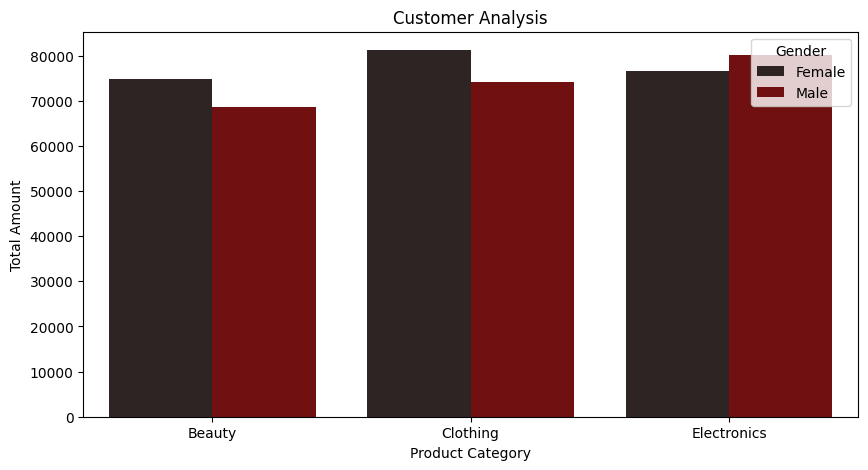

In [46]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
plt.figure(figsize=(10,5))
sns.barplot(data=grouped_customer_analysis, x='Product Category', y = 'Total Amount', hue = 'Gender', color = 'Maroon')
plt.title('Customer Analysis')


In [15]:
pivot_table = df_table.pivot_table(index='Product Category',columns='Gender',values= "Total Amount", aggfunc='sum')
pivot_table

Gender,Female,Male
Product Category,,
Beauty,74830,68685
Clothing,81275,74305
Electronics,76735,80170


Text(0.5, 1.0, 'Heatmap Showing relationship between Total amount spent, Genders and the Product Category')

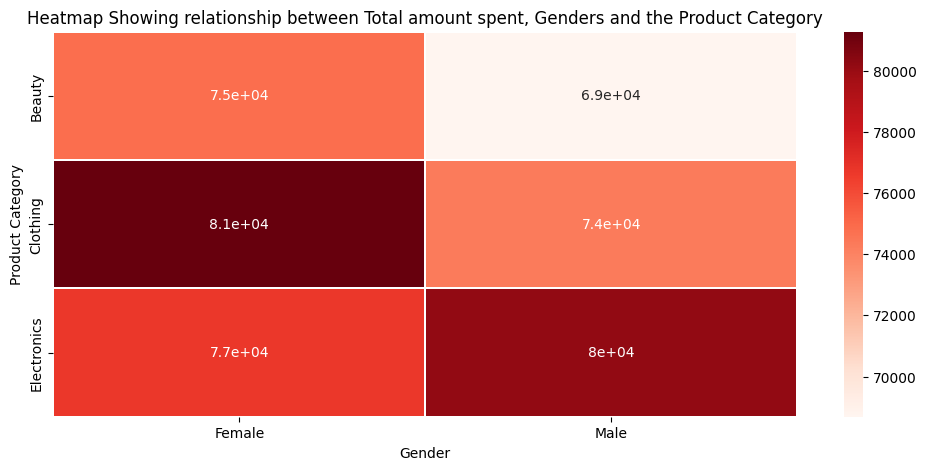

In [16]:
plt.figure(figsize = (12,5))
sns.heatmap(data=pivot_table, cmap='Reds', linecolor='white', linewidths=0.3, annot=True)
plt.title('Heatmap Showing relationship between Total amount spent, Genders and the Product Category')

:From the 'Customer Analysis' Bar plot, we see that women spend more on 'clothings' and 'Beauty' than men, while men spend more on 'Electroncs'.

Analysing Customer behaviour with Age

In [17]:
customer_aanalysis_with_age = df_table[['Age', 'Product Category', 'Total Amount']].\
    groupby(['Age', 'Product Category'])['Total Amount'].sum().reset_index()
customer_aanalysis_with_age
#sns.histplot(data=customer_aanalysis_with_age, x = 'Age', y='Total Amount', hue='Product Category')

,Age,Product Category,Total Amount
0,18,Beauty,4960
1,18,Clothing,4085
2,18,Electronics,2170
3,19,Beauty,4365
4,19,Clothing,2730
...,...,...,...
136,63,Clothing,2470
137,63,Electronics,6625
138,64,Beauty,2330
139,64,Clothing,5555


In [18]:
Age_grouped_by_beauty= customer_aanalysis_with_age.query('`Product Category` == "Beauty"')
Age_grouped_by_beauty.sort_values(by ='Total Amount', ascending=False).head(3)

,Age,Product Category,Total Amount
84,46,Beauty,8570
9,21,Beauty,8000
48,34,Beauty,7405


In [19]:
#customer_aanalysis_with_age.query('`Product Category`=="Beauty"')

Total Amount spent by Age plot

In [20]:
Total_amount_vs_age = df_table.groupby(['Age'])['Total Amount'].sum().reset_index()
Total_amount_vs_age
#Total_amount_vs_age = df_table.groupby(['Age', 'Product Category'])['Total Amount'].sum().reset_index()
#Total_amount_vs_age

,Age,Total Amount
0,18,11215
1,19,14870
2,20,8645
3,21,12585
4,22,13700
5,23,8220
6,24,5415
7,25,9900
8,26,13980
9,27,9385


Text(0.5, 1.0, 'Total Amount vs Age')

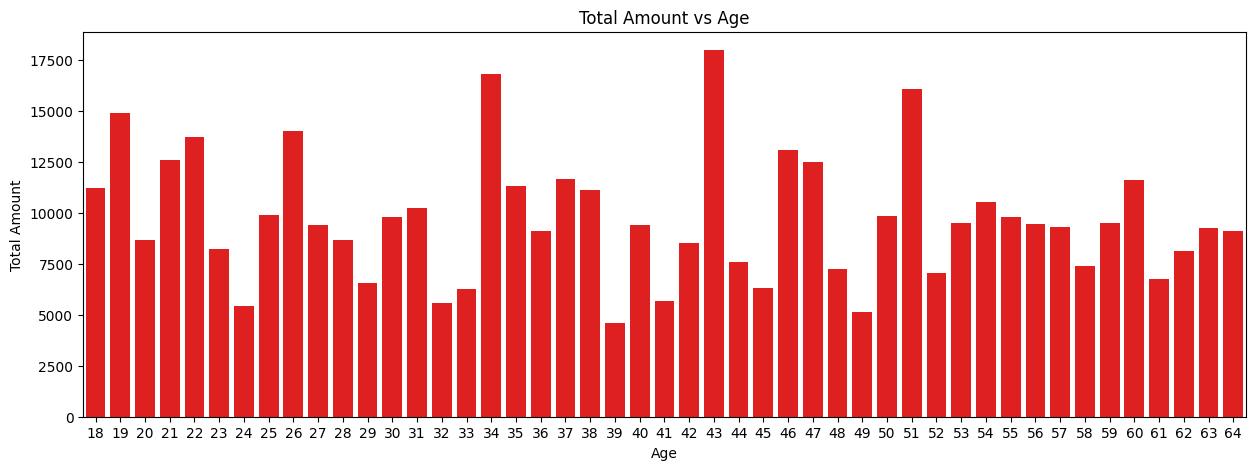

In [31]:
plt.figure(figsize=(15,5))
sns.barplot(data=Total_amount_vs_age, x = 'Age', y='Total Amount', color='red')
plt.title('Total Amount vs Age')

INSIGHT: The Total Amount vs Age analysis and visualization shows the relationship between age and total amount spent. We can see that the age with the max and least Total amount spent is 43 and 39 respectively.  

Understanding the Age with the max Total amount spent:

In [22]:
max_age_vs_total_amount = df_table.query('`Age` == 43')
max_age_vs_total_amount
#query('`Gender` == 'Male'')

,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount
27,28,2023-04-23,CUST028,Female,43,Beauty,1,500,500
69,70,2023-02-21,CUST070,Female,43,Clothing,1,300,300
151,152,2023-02-28,CUST152,Male,43,Electronics,4,500,2000
155,156,2023-11-25,CUST156,Female,43,Clothing,4,25,100
159,160,2023-08-11,CUST160,Female,43,Clothing,2,50,100
166,167,2023-09-17,CUST167,Female,43,Clothing,3,50,150
175,176,2023-07-11,CUST176,Female,43,Beauty,2,50,100
182,183,2023-09-08,CUST183,Female,43,Beauty,3,300,900
204,205,2023-11-07,CUST205,Female,43,Clothing,1,25,25
231,232,2023-02-06,CUST232,Female,43,Beauty,1,25,25


In [23]:
max_age_vs_total_amount.groupby(['Age',"Product Category"])['Total Amount'].sum().reset_index()

,Age,Product Category,Total Amount
0,43,Beauty,2545
1,43,Clothing,6415
2,43,Electronics,9010


In [24]:
max_age_vs_total_amount.groupby(['Age',"Product Category"])['Quantity'].sum().reset_index()

,Age,Product Category,Quantity
0,43,Beauty,14
1,43,Clothing,38
2,43,Electronics,37


TOTAL AMOUNT, GENDER AND PRODUCT CATEGORY CORRELATION WITH HEATMAP

In [25]:
pivot_table = df_table.pivot_table(values='Total Amount', index='Product Category', columns
                                   ='Gender', margins=True, aggfunc='sum' )
pivot_table

Gender,Female,Male,All
Product Category,,,
Beauty,74830,68685,143515
Clothing,81275,74305,155580
Electronics,76735,80170,156905
All,232840,223160,456000


Time Series Analysis on Retail Sales Dataset

In [26]:
df_table['Date'] = pd.to_datetime(df_table['Date'])
df_table.dtypes

Transaction ID               int64
Date                datetime64[ns]
Customer ID                 object
Gender                      object
Age                          int64
Product Category            object
Quantity                     int64
Price per Unit               int64
Total Amount                 int64
dtype: object

In [27]:
df_table_tsa = df_table.set_index('Date')
df_table_tsa

,Transaction ID,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount
Date,,,,,,,,
2023-11-24,1,CUST001,Male,34,Beauty,3,50,150
2023-02-27,2,CUST002,Female,26,Clothing,2,500,1000
2023-01-13,3,CUST003,Male,50,Electronics,1,30,30
2023-05-21,4,CUST004,Male,37,Clothing,1,500,500
2023-05-06,5,CUST005,Male,30,Beauty,2,50,100
...,...,...,...,...,...,...,...,...
2023-05-16,996,CUST996,Male,62,Clothing,1,50,50
2023-11-17,997,CUST997,Male,52,Beauty,3,30,90
2023-10-29,998,CUST998,Female,23,Beauty,4,25,100


Average Age Per month:

/var/folders/97/31pwhl9978z102kvp11b4wzr0000gn/T/ipykernel_1672/1875262890.py:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  Average_age_per_month = df_table_tsa.Age.resample('M').mean()


Text(0.5, 1.0, 'Average Age Per Month')

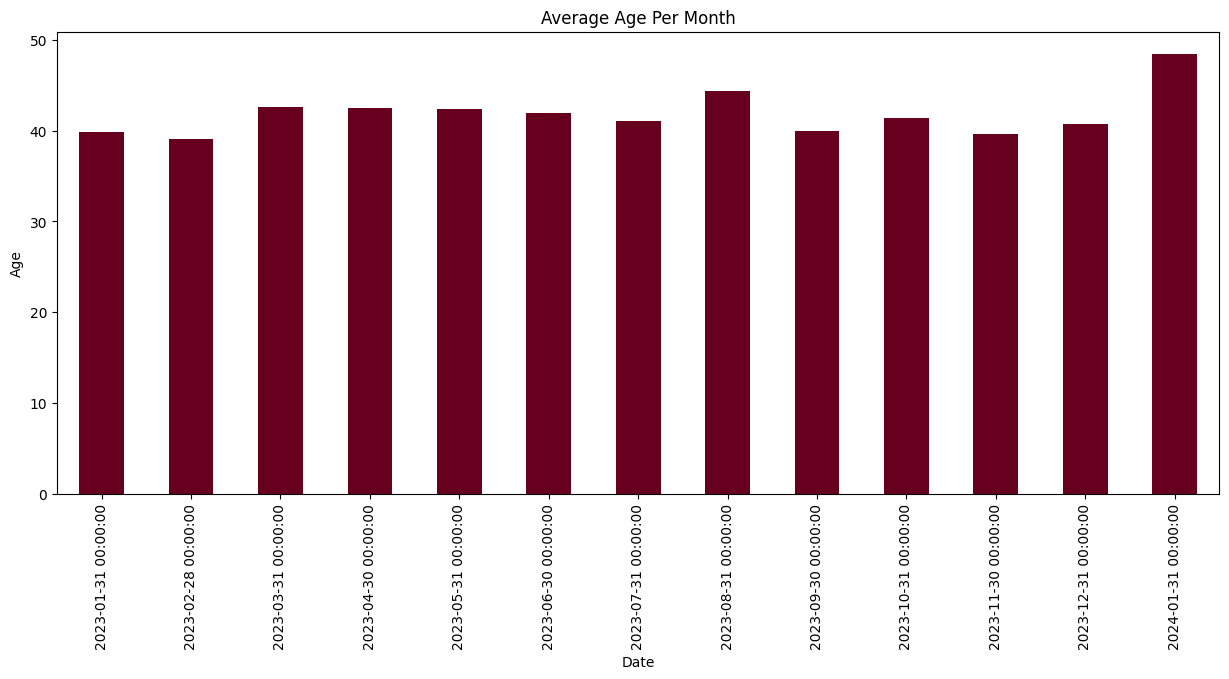

In [40]:
Average_age_per_month = df_table_tsa.Age.resample('M').mean()
#print(Average_age_per_month)
plt.figure(figsize=(15,6))
Average_age_per_month.plot(kind='bar', colormap= 'RdGy')
plt.ylabel('Age')
plt.title('Average Age Per Month')

Total Amount spent per Month

/var/folders/97/31pwhl9978z102kvp11b4wzr0000gn/T/ipykernel_1672/2331144043.py:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  total_amount_per_month = df_table_tsa['Total Amount'].resample('M').mean()


Text(0.5, 1.0, 'Total Amount Per Month')

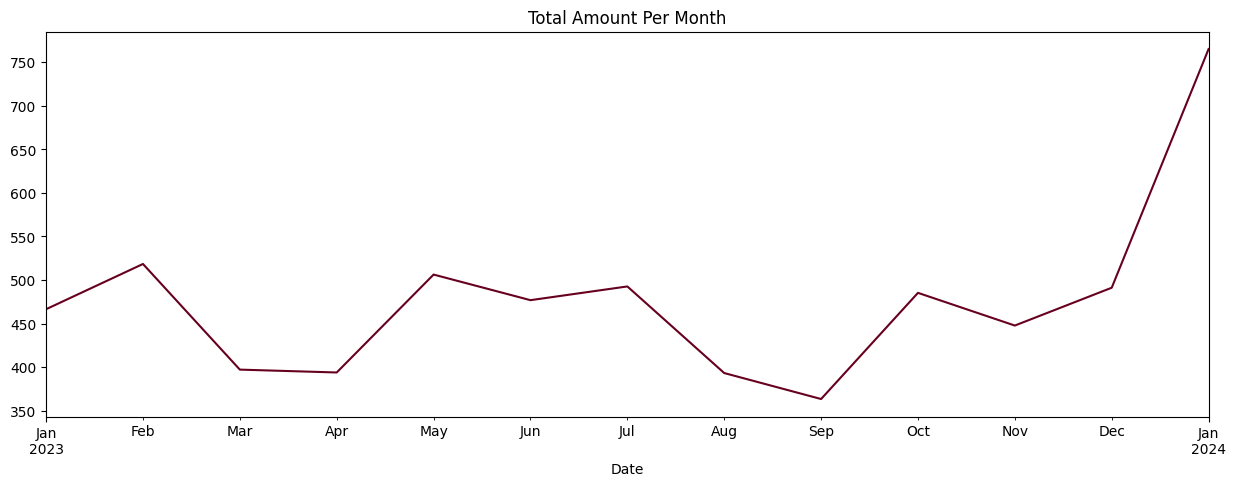

In [42]:
total_amount_per_month = df_table_tsa['Total Amount'].resample('M').mean()
total_amount_per_month
plt.figure(figsize=(15,5))
total_amount_per_month.plot(kind='line',colormap='RdGy')
plt.title('Total Amount Per Month')

INSIGHTS on the EDA:
- From the 'Customer Analysis' Bar plot and heatmap, we see that women spend more on 'clothings' and 'Beauty' than men, while men spend more on 'Electroncs with 'Beauty products being the least 'Product category' spent on by both Males and Females'

- The Total Amount vs Age analysis and visualization shows the relationship between age and total amount spent. We can see that the age with the max and least Total amount spent were 43 and 39 respectively.

- We also understand that the people of Age 43 bought more quantity of 'Clothings' (38) and spent more on 'Electronics'(9010)

- From the above Time Series Analysis (barplot and lineplot), we can see that the average customer age each month ranged from 39 to 48 and the highest total amount spent per month was in the January 2024(765)

- We can also decode that the customers in the month with the max amount spent (January 2024) were averagely 48 years old. 

RECOMMENDATIONS:
- To increase amount spent and quantity of Beauty products bought, more strategic ad campaigns about them could be ran specifically tagetted to women of ages of 21, 34 and 46.

- More Electronics could be added to the inventry to increase Total amount spent.

- More ads campaigns about different sales and promo could also be employed during the new years to drive up traffic.